In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import recordlinkage as rl 
from recordlinkage.index import Block

In [287]:
df_frame = pd.read_csv("tbl_listing_info_amsterdam_20200104.csv")
df_new = pd.read_csv("tbl_listings_research_18_02_2022.csv")
df_extra = pd.read_csv("tbl_listing_description_07_03_2022.csv")

In [288]:
#print(df_frame.columns)
print(len(df_frame.columns))
#print(df_new.columns)
print(len(df_new.columns))

64
47


In [289]:
df_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23173 entries, 0 to 23172
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   wsa_listing_id                    23173 non-null  int64  
 1   customer_name                     23173 non-null  object 
 2   site                              23173 non-null  object 
 3   listing_id                        23173 non-null  object 
 4   registration_number               4600 non-null   object 
 5   house_name                        21888 non-null  object 
 6   city                              23173 non-null  object 
 7   postalcode                        23168 non-null  object 
 8   bedrooms                          21294 non-null  object 
 9   bathrooms                         9259 non-null   object 
 10  beds                              21751 non-null  object 
 11  person_capacity                   21135 non-null  float64
 12  host

In [290]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      5457 non-null   object 
 1   ListingId                 5457 non-null   int64  
 2   registration_number       4209 non-null   object 
 3   Bathrooms                 5447 non-null   float64
 4   Bedrooms                  5441 non-null   float64
 5   Beds                      5414 non-null   float64
 6   City                      5452 non-null   object 
 7   Listing_id_str            5457 non-null   int64  
 8   Instant_bookable          5457 non-null   object 
 9   Is_business_travel_ready  5457 non-null   object 
 10  Is_family_preferred       5457 non-null   object 
 11  Is_new_listing            5457 non-null   object 
 12  Lat                       5457 non-null   float64
 13  Lng                       5457 non-null   float64
 14  Localize

In [291]:
# From the frames this columns seem to contain the same entries Host_first_name== User_first_name == User_Smart_name == HOst_Smart_name 
# from df_frame custumer name == city == City in df_new
# Some of the columns of df_new refer to the same column in df_frame but with different name

df_frame.rename(columns={'customer_name':'City','house_name':'Name','bathrooms':'Bathrooms','bedrooms':'Bedrooms',
                        'beds':'Beds','listing_id':'ListingId','instant_bookable':'Instant_bookable','is_new_listing':'Is_new_listing',
                        'lat':'Lat','lng':'Lng','region':'Neighborhood','person_capacity':'Person_capacity','picture_url':'Picture_url',
                        'host_name':'Host_first_name','host_id':'Host_id','property_type':'Property_type','room_type_category':'Room_type_category',
                        'room_type':'Room_type','space_type':'Space_type','host_picture':'Host_picture_url'},inplace= True)

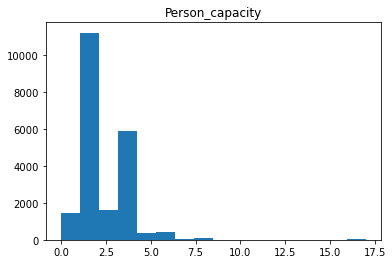

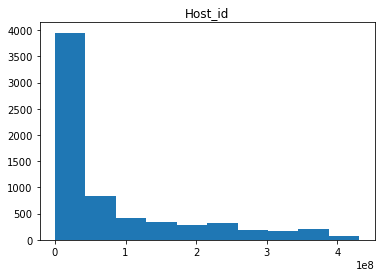

In [292]:
def histogram(df,column,bins=False):
    try:
        if df[column].dtype == 'object':
            df_1 = df[column].dropna().str.replace(',', '.').astype('float64')
        else:
            df_1 = df[column].dropna().astype('float64')
    except AttributeError:
        df_1 = df[column].astype('float64')
        
    bins = len(set(list(df[column].dropna())))
    if bins <= 25 :
        plt.hist(df_1,bins=bins)
        plt.title(column)
        plt.show()
    else:
        plt.hist(df_1)
        plt.title(column)
        plt.show()
    return 

histogram(df_frame,'Person_capacity')
histogram(df_frame,'Host_id')


In [293]:
df_frame['ListingId'] = df_frame['ListingId'].str.replace('[A-Za-z]', '').astype('int64') # remove letters-ListingId has entries which start with a letter h123133... only in some sites
df_frame['Person_capacity'].fillna(0,inplace=True)   # There are Nan values which creates a conflict while converting all columns into the same dtype , turn them to 0 temporarily
df_frame['Host_id'].fillna(0,inplace=True) 
df_frame['Instant_bookable']= df_frame['Instant_bookable'].astype('int64') 
similar_columns = []
# Make every similar column match the dtype so it can be joined
for column in df_new.columns:
    
    if column in df_frame.columns: #Only use columns which are similar in both df
        dtype = df_new[column].dtypes
        dtype_2 = df_frame[column].dtypes
        similar_columns.append(column) # Save the similar keys in both dfs for joining
        
        
        if dtype == 'float64' and dtype!= dtype_2: # If the dtype needs to be float and they have different dtypes remove commas, numbers are 1,20 instead of 1.20 which is needed for conversion
            df_frame[column]= df_frame[column].str.replace(',', '.').astype(dtype)
        elif dtype!= dtype_2: # If they are not the same just change the dtype
            df_frame[column]= df_frame[column].astype(dtype) 




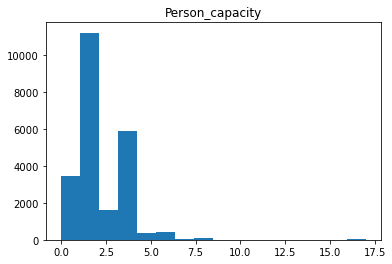

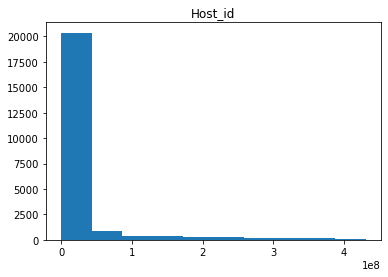

In [294]:
histogram(df_frame,'Person_capacity')
histogram(df_frame,'Host_id')


In [297]:
df_merged = pd.merge(df_frame,df_new, on="ListingId",how='left', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

#df_extra.rename(columns={'listingid':'ListingId'},inplace=True)
#df_merged= pd.merge(df_frame,df_extra, on='ListingId',how='left')

In [333]:
df_extra['Description'][df_extra['listingid']==9996040].iloc[1]
df_extra
#df_merged['listing_url'][df_merged['ListingId']==10008030]

,ID,listingid,Description
0,1,10008030,Authentic ground floor house in the lively nei...
1,2,10008030,Authentic ground floor house in the lively nei...
2,3,10008030,Authentic ground floor house in the lively nei...
3,4,10008030,The dining room has a huge window makes you fe...
4,6,10008030,Hulpdieren mogen mee en hoeven niet als huisdi...
...,...,...,...
50614,63294,9996040,Ons moderne en mooie open appartement ligt in ...
50615,63295,9996040,Ons moderne en mooie open appartement ligt in ...
50616,63296,9996040,De titel van deze accommodatie is automatisch ...
50617,63297,9996040,Hulpdieren mogen mee en hoeven niet als huisdi...


In [372]:
list(df_merged['User_Is_superhost'])
set(list(df_merged['Host_has_profile_pic']))
# User_Is_superhost? ,Is_business_travel_ready,Is_family_preferred, Host_has_profile_pic

{'-1', '0', 'false', nan, 'true'}

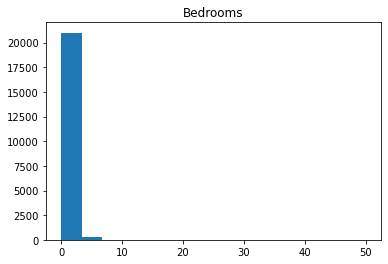

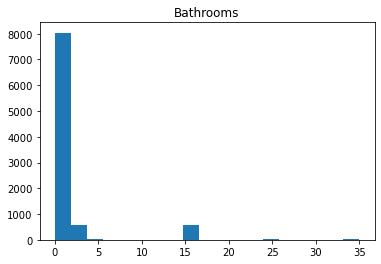

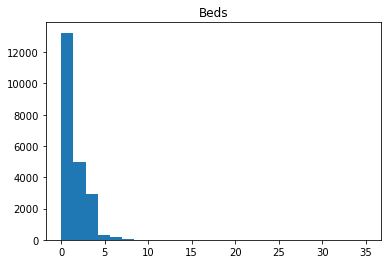

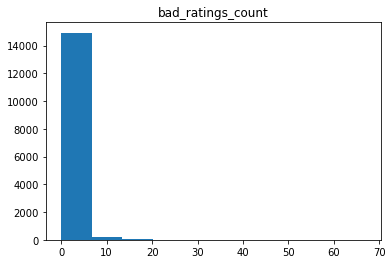

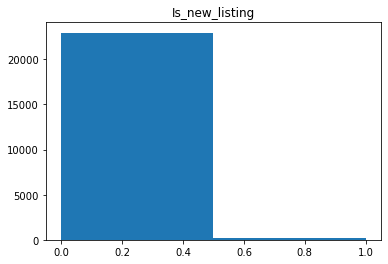

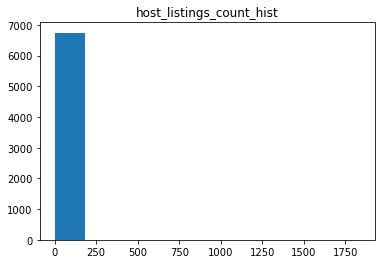

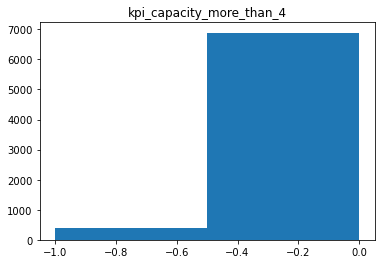

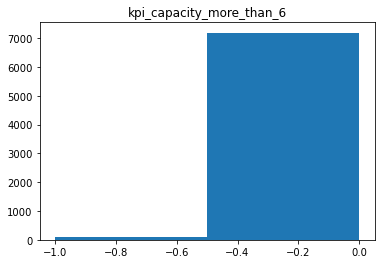

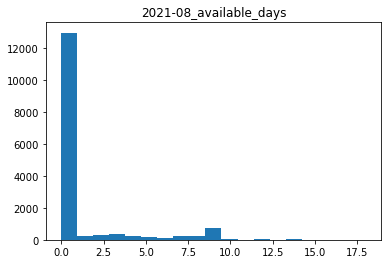

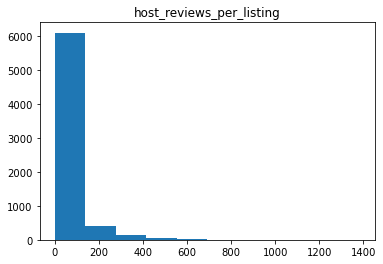

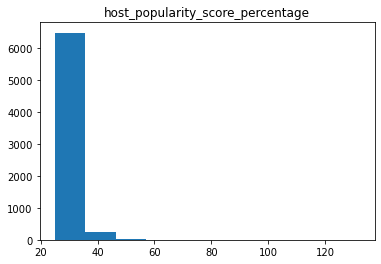

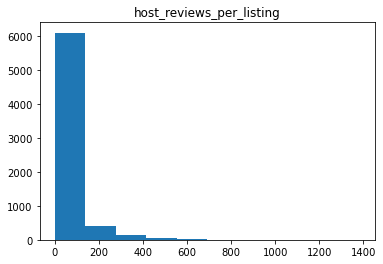

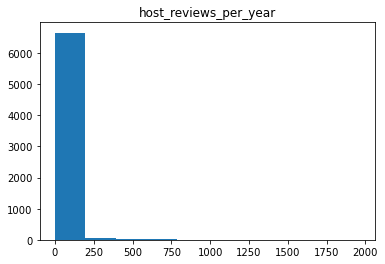

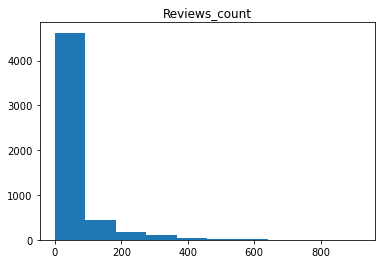

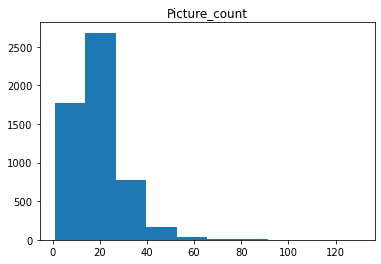

In [310]:
histogram(df_merged,'Bedrooms')
histogram(df_merged,'Bathrooms')
histogram(df_merged,'Beds')
histogram(df_merged,'bad_ratings_count')
histogram(df_merged,'Is_new_listing')
histogram(df_merged,'host_listings_count_hist')
histogram(df_merged,'kpi_capacity_more_than_4')
histogram(df_merged,'kpi_capacity_more_than_6')
histogram(df_merged,'2021-08_available_days')
histogram(df_merged,'host_reviews_per_listing')
histogram(df_merged,'host_popularity_score_percentage')
histogram(df_merged,'host_reviews_per_listing')
histogram(df_merged,'host_reviews_per_year')
histogram(df_merged,'Reviews_count')
histogram(df_merged,'Picture_count')

In [281]:
#drop Nan names? mostly incomplete check again after deciding which feautures to take 1285 Nan
# Columns which are mainly empty or have similar information that other columns 
df_merged.drop(columns = ['wsa_listing_id','city','City','2021-06_available_days','registration_number','2021-07_available_days', '2022-01_available_days'],inplace=True)

In [284]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23173 entries, 0 to 23172
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   site                              23173 non-null  object 
 1   ListingId                         23173 non-null  int64  
 2   Name                              21888 non-null  object 
 3   postalcode                        23168 non-null  object 
 4   Bedrooms                          21294 non-null  float64
 5   Bathrooms                         9259 non-null   float64
 6   Beds                              21751 non-null  float64
 7   Person_capacity                   23173 non-null  int64  
 8   Host_first_name                   20036 non-null  object 
 9   Host_id                           23173 non-null  int64  
 10  Host_picture_url                  8566 non-null   object 
 11  Instant_bookable                  23173 non-null  object 
 12  Is_n

In [76]:
platforms = set([x for x in df_merged['site']])
print(platforms)

{'AIRBNB', 'Expedia', 'VRBO', 'Tripadvisor', 'Booking'}


In [352]:
df_frame['listing_url'][df_frame['Person_capacity']==0].loc[23024]
#df_frame['listing_url'][df_frame['ListingId'] == 10008030]
#df_frame['listing_url'].iloc[100]

'https://www.vrbo.com/nl-nl/vakantiewoning/p8382181?noDates=true'

In [12]:
def tot_nan_column(df,column):  
    df[column].notna().sum()
    nan_val= df[column].notna().sum()
    return nan_val

In [373]:
df_bnb = df_merged[df_merged['site'] == 'AIRBNB']
df_book = df_merged[df_merged['site'] == 'Booking']
df_exp = df_merged[df_merged['site'] == 'Expedia']
df_trip = df_merged[df_merged['site'] == 'Tripadvisor']
df_verb = df_merged[df_merged['site'] == 'VRBO']

In [374]:
print('AIRBNB total lisitngs : ',len(df_bnb))
print('Booking total lisitngs : ',len(df_book))
print('Expedia total lisitngs : ',len(df_exp))
print('Tripadvisor total lisitngs : ',len(df_trip))
print('VRBO total lisitngs : ',len(df_verb))

AIRBNB total lisitngs :  21173
Booking total lisitngs :  621
Expedia total lisitngs :  168
Tripadvisor total lisitngs :  523
VRBO total lisitngs :  688


In [15]:
print('Total longitude',tot_nan_column(df_frame,'lng'))
print('Total latitude',tot_nan_column(df_frame,'lat'))
print('Total AirBnB longitude',tot_nan_column(df_bnb,'lng'))
print('Total AirBnB latitude',tot_nan_column(df_bnb,'lat'))
print('Total Booking longitude',tot_nan_column(df_book,'lng'))
print('Total Booking latitude',tot_nan_column(df_book,'lat'))
print('Total Expedia longitude',tot_nan_column(df_exp,'lng'))
print('Total Expedia latitude',tot_nan_column(df_exp,'lat'))
print('Total TripAD longitude',tot_nan_column(df_trip,'lng'))
print('Total TripAD latitude',tot_nan_column(df_trip,'lat'))
print('Total VRBO longitude',tot_nan_column(df_verb,'lng'))
print('Total VRBO latitude',tot_nan_column(df_verb,'lat'))

Total longitude 21921
Total latitude 21921
Total AirBnB longitude 19921
Total AirBnB latitude 19921
Total Booking longitude 621
Total Booking latitude 621
Total Expedia longitude 168
Total Expedia latitude 168
Total TripAD longitude 523
Total TripAD latitude 523
Total VRBO longitude 688
Total VRBO latitude 688


In [375]:
df_merged['postalcode'] = df_merged['postalcode'].map(lambda x: float("NaN") if x =='Onbekend' else x)
df_merged['postalcode']

0            NaN
1            NaN
2            NaN
3            NaN
4        1072 JR
          ...   
23168    1053 AA
23169    1095 AE
23170    1012 WL
23171    1013 GW
23172    1071 JM
Name: postalcode, Length: 23173, dtype: object

In [380]:
#Calculate non nan values in their columns
def in_nan(site):
       nan_val = {}
       for x in df_frame.columns :   
              if df_frame[df_frame['site'] == site][x].notna().sum() != 0:
                     nan_val[x]= df_frame[df_frame['site'] == site][x].notna().sum()
                     
       return nan_val

In [381]:
#Not nan values in their columns
nan_aribnb = in_nan('AIRBNB')
nan_book = in_nan('Booking')
nan_exp = in_nan('Expedia')
nan_trip = in_nan('Tripadvisor')
nan_vrb = in_nan('VRBO')

In [382]:
nan_trip.keys()

dict_keys(['wsa_listing_id', 'City', 'site', 'ListingId', 'Name', 'city', 'postalcode', 'Bedrooms', 'Bathrooms', 'Beds', 'Person_capacity', 'Host_id', 'Instant_bookable', 'Is_new_listing', 'Neighborhood', 'Lat', 'Lng', 'reviews_count', 'kpi_instant_bookable', 'listing_url', 'first_found_date', 'listing_published', 'listing_can_book'])

In [383]:
print('aribnb columns withouth nan values:' , len(nan_aribnb))
print('book columns without nan values:' , len(nan_book))
print('exp columns without nan values:' , len(nan_exp))
print('trip columns without nan values:' , len(nan_trip))
print('vrb columns without nan values:' , len(nan_vrb))

aribnb columns withouth nan values: 62
book columns without nan values: 27
exp columns without nan values: 22
trip columns without nan values: 23
vrb columns without nan values: 27


In [25]:
def get_dataframe_info(df):
    """
    input
       df -> DataFrame
    output
       df_null_counts -> DataFrame Info (sorted)
    """

    df_types = pd.DataFrame(df.dtypes)
    df_nulls = df.count()
    
    df_null_count = pd.concat([df_types, df_nulls], axis=1)
    df_null_count = df_null_count.reset_index()
    
    # Reassign column names
    col_names = ["features", "types", "non_null_counts"]
    df_null_count.columns = col_names
    
    # Add this to sort
    
    
    return df_null_count
print(get_dataframe_info(df_frame).to_latex())

\begin{tabular}{lllr}
\toprule
{} &                          features &    types &  non\_null\_counts \\
\midrule
0  &                    wsa\_listing\_id &    int64 &            23173 \\
1  &                     customer\_name &   object &            23173 \\
2  &                              site &   object &            23173 \\
3  &                        listing\_id &   object &            23173 \\
4  &               registration\_number &   object &             4600 \\
5  &                        house\_name &   object &            21888 \\
6  &                              city &   object &            23173 \\
7  &                        postalcode &   object &            23168 \\
8  &                          bedrooms &   object &            21294 \\
9  &                         bathrooms &   object &             9259 \\
10 &                              beds &   object &            21751 \\
11 &                   person\_capacity &  float64 &            21135 \\
12 &           

In [15]:
#indexer = recordlinkage.Index()
indexer = rl.BlockIndex(on='postalcode')
candidate_links = indexer.index(df_bnb, df_verb)

print (len(candidate_links))

1186


In [15]:
compare_cl = rl.Compare()

compare_cl.exact('postalcode', 'postalcode', label='postalcode')
compare_cl.numeric('lat', 'lat', label='lat')
compare_cl.numeric('lng', 'lng', label='lng')


features = compare_cl.compute(candidate_links, df_bnb, df_verb)

In [17]:
features.sum(axis=1).value_counts().sort_index(ascending=False).iloc[:20]

2.999999     1
2.999998     1
2.999998     1
2.999998     1
2.999998     1
2.999997     4
2.999997     1
2.999997    45
2.999997     1
2.999996     1
2.999996     1
2.999995     1
2.999984    11
2.999983    36
2.999982     1
2.999980     1
2.999977     1
2.999977     1
2.999976     1
2.999974     1
dtype: int64

In [30]:
features[features.sum(axis=1) > 2.999982]

postalcode       lat       lng
12125 22515           1  1.000000  0.999998
      22517           1  1.000000  0.999998
12126 22515           1  1.000000  0.999998
      22517           1  1.000000  0.999998
8290  22920           1  0.999999  0.999999
...                 ...       ...       ...
14879 22633           1  0.999997  0.999998
10766 22780           1  0.999998  1.000000
10797 23085           1  1.000000  0.999998
20993 22570           1  0.999999  0.999997
20196 22985           1  0.999999  0.999999

[106 rows x 3 columns]

In [31]:

rl.write_annotation_file(
    "annotation_bnb_vrb.json",
    features[features.sum(axis=1) > 2.999982  ].index,
    df_bnb[['wsa_listing_id', 'customer_name', 'site', 'listing_id', 'house_name', 'city', 'postalcode', 'bedrooms', 'bathrooms', 'beds', 'person_capacity', 'host_name', 'host_picture', 'instant_bookable', 'is_new_listing', 'region', 'lat', 'lng', 'picture_url', 'reviews_count', 'property_type', 'kpi_instant_bookable', 'listing_url', 'first_found_date', 'listing_published', 'listing_can_book']],
    df_verb[['wsa_listing_id', 'customer_name', 'site', 'listing_id', 'house_name', 'city', 'postalcode', 'bedrooms', 'bathrooms', 'beds', 'person_capacity', 'host_name', 'host_picture', 'instant_bookable', 'is_new_listing', 'region', 'lat', 'lng', 'picture_url', 'reviews_count', 'property_type', 'kpi_instant_bookable', 'listing_url', 'first_found_date', 'listing_published', 'listing_can_book']],
    dataset_a_name="AirBnb",
    dataset_b_name="VRBO"
)

In [46]:
df_verb['listing_url'].loc[23085]

'https://www.vrbo.com/nl-nl/vakantiewoning/p8848002?noDates=true'

In [42]:

df_bnb['picture_url'].loc[7959]

'https://a0.muscache.com/im/pictures/cea0b565-370d-4bfe-a80c-b90a155aae9b.jpg?aki_policy=large'

In [50]:
result = rl.read_annotation_file('result_bnb_vrb.json')
print('Matches in AirBnB and VRBO with Postal code Lat, Ln:',len(result.links))
print('Non-matches in AirBnB and VRBO with Postal code Lat, Ln:',len(result.distinct))

Matches in AirBnB and VRBO with Postal code Lat, Ln: 19
Non-matches in AirBnB and VRBO with Postal code Lat, Ln: 87


In [80]:
#indexer = recordlinkage.Index()
indexer = rl.BlockIndex(on='postalcode')
candidate_links = indexer.index(df_bnb, df_trip)

print (len(candidate_links))

783


In [81]:
compare_cl = rl.Compare()

compare_cl.exact('postalcode', 'postalcode', label='postalcode')
compare_cl.numeric('lat', 'lat', label='lat')
compare_cl.numeric('lng', 'lng', label='lng')


features = compare_cl.compute(candidate_links, df_bnb, df_trip)

In [82]:
features.sum(axis=1).value_counts().sort_index(ascending=False).iloc[80:100]

2.999904    1
2.999903    1
2.999903    1
2.999903    2
2.999903    2
2.999902    1
2.999902    1
2.999900    1
2.999900    1
2.999899    1
2.999898    1
2.999898    1
2.999897    2
2.999897    1
2.999896    1
2.999895    1
2.999895    1
2.999893    6
2.999893    1
2.999892    1
dtype: int64

In [83]:
features[features.sum(axis=1) > 2.999892 ]

postalcode       lat       lng
86    22424           1  0.999997  0.999951
293   22009           1  0.999962  0.999945
3681  22009           1  0.999978  0.999970
458   22302           1  0.999995  0.999931
461   22075           1  0.999976  0.999987
...                 ...       ...       ...
18094 22176           1  0.999969  0.999960
      22239           1  0.999969  0.999960
19168 22011           1  0.999997  0.999898
20799 22408           1  0.999994  0.999947
      22421           1  0.999992  0.999951

[129 rows x 3 columns]

In [78]:
print(df_bnb[nan_trip.keys()].loc[20799])
print(df_trip[nan_trip.keys()].loc[22408])

wsa_listing_id                                       15454
customer_name                                    Amsterdam
site                                                AIRBNB
listing_id                                          920560
house_name                                   The Guestroom
city                                             Amsterdam
postalcode                                         1098 CP
bedrooms                                              1,00
bathrooms                                             1,00
beds                                                  2,00
person_capacity                                          4
instant_bookable                                         1
is_new_listing                                           0
region                                      Amsterdam-Oost
lat                                                52.3545
lng                                                4.93366
reviews_count                                          1

In [84]:
rl.write_annotation_file(
    "annotation_bnb_trip.json",
    features[features.sum(axis=1) > 2.999892 ].index,
    df_bnb[nan_trip.keys()],
    df_trip[nan_trip.keys()],
    dataset_a_name="AirBnb",
    dataset_b_name="Trip"
)

In [86]:
df_trip['picture_url'].loc[22009]


nan

In [89]:
df_bnb['picture_url'].loc[743]


'https://a0.muscache.com/im/pictures/ab5d3785-4977-463f-8d85-f46c7d52807d.jpg?aki_policy=large'

In [106]:
result = rl.read_annotation_file('result_bnb_trip.json')
print('Matches in AirBnB and VRBO with Postal code Lat, Ln:',len(result.links))
print('Non-matches in AirBnB and VRBO with Postal code Lat, Ln:',len(result.distinct))

Matches in AirBnB and VRBO with Postal code Lat, Ln: 28
Non-matches in AirBnB and VRBO with Postal code Lat, Ln: 101
